In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplhep
from mplhep import *
linestyle_str = [
('solid', 'solid'), # Same as (0, ()) or '-'
('dotted', '.'),# Same as (0, (1, 1)) or '.'
('dashed', '--'),   # Same as '--'
('dashdot', '-.')]  # Same as '-.'
from matplotlib.pyplot import *
import matplotlib as mpl
plt.rc('text', usetex=True)
plt.rc('font', family='Times New Roman')
from  matplotlib import *
mpl.rcParams['figure.figsize'] = (10,6)
import sympy as sy
sy.init_printing()
from sympy import *
%matplotlib inline

In [2]:
MSd_list = list(range(360, 1500, 10))
Sa_list = [0.2]
MSd, X, Sa = symbols('MSd X Sa')
MW = 80.4
MZ = 91.2
cw = MW/MZ
sw = sy.sqrt(1 - cw**2)
MU = 0.00255
MC = 1.27
MT = 172
MD = 0.00504
MS = 0.101
MB = 4.7
vev = 246
yt = np.sqrt(2)*MT/vev
MTA = 1.777
ytau = MTA*sy.sqrt(2)/vev
ee = (2*MW*sw)/vev
gqA =0
MZp = 2000
Mchi = 65
gchi = 1
ychi = 1.0
Mh = 125
vev2 = MZp/(2*gchi)
gZp = 1 
gsd = -2*gchi

In [3]:
def BRSd(MSd_list, Sa_list):
    BRqq= []
    BRXdXd = []
    Sdqq_values = []
    SdXdXd_values = []
    SdtotalW_values = []
    Ca = sy.sqrt(1 - Sa**2)
    lam3 = (MSd**2 - Mh**2)/(vev2*vev)*Sa*Ca
    lam2 = Mh**2/(2*vev2**2)*Sa**2 + MSd**2/(2*vev2**2)*Ca**2
    lam1 = Mh**2/(2*vev**2)*Ca**2 + MSd**2/(2*vev**2)*Sa**2
    Sdhh = ((36*Ca**4*lam1**2*Sa**2*vev**2 - 24*Ca**4*lam1*lam3*Sa**2*vev**2 + 4*Ca**4*lam3**2*Sa**2*vev**2 + 12*Ca**2*lam1*lam3*Sa**4*vev**2 - 4*Ca**2*lam3**2*Sa**4*vev**2 + lam3**2*Sa**6*vev**2 + 12*Ca**5*lam1*lam3*Sa*vev*vev2 - 4*Ca**5*lam3**2*Sa*vev*vev2 + 72*Ca**3*lam1*lam2*Sa**3*vev*vev2 - 24*Ca**3*lam1*lam3*Sa**3*vev*vev2 - 24*Ca**3*lam2*lam3*Sa**3*vev*vev2 + 10*Ca**3*lam3**2*Sa**3*vev*vev2 + 12*Ca*lam2*lam3*Sa**5*vev*vev2 - 4*Ca*lam3**2*Sa**5*vev*vev2 + Ca**6*lam3**2*vev2**2 + 12*Ca**4*lam2*lam3*Sa**2*vev2**2 - 4*Ca**4*lam3**2*Sa**2*vev2**2 + 36*Ca**2*lam2**2*Sa**4*vev2**2 - 24*Ca**2*lam2*lam3*Sa**4*vev2**2 + 4*Ca**2*lam3**2*Sa**4*vev2**2)*sy.sqrt(-4*Mh**2*MSd**2 + MSd**4))/(32*sy.pi*abs(MSd)**3)
    SdXdXd = ((-4*Ca**2*Mchi**2*ychi**2 + Ca**2*MSd**2*ychi**2)*sy.sqrt(-4*Mchi**2*MSd**2 + MSd**4))/(32*sy.pi*abs(MSd)**3)
    Sdtata = ((MSd**2*Sa**2*ytau**2 - 4*MTA**2*Sa**2*ytau**2)*sy.sqrt(MSd**4 - 4*MSd**2*MTA**2))/(16*sy.pi*abs(MSd)**3)
    Sdtt = ((3*MSd**2*Sa**2*yt**2 - 12*MT**2*Sa**2*yt**2)*sy.sqrt(MSd**4 - 4*MSd**2*MT**2))/(16*sy.pi*abs(MSd)**3)
    SdWW = (((3*ee**4*Sa**2*vev**2)/(4*sw**4) + (ee**4*MSd**4*Sa**2*vev**2)/(16*MW**4*sw**4) - (ee**4*MSd**2*Sa**2*vev**2)/(4*MW**2*sw**4))*sy.sqrt(MSd**4 - 4*MSd**2*MW**2))/(16*sy.pi*abs(MSd)**3)
    SZpZp = ((192*Ca**2*gchi**4*gZp**4*vev2**2 + (16*Ca**2*gchi**4*gZp**4*MSd**4*vev2**2)/MZp**4 - (64*Ca**2*gchi**4*gZp**4*MSd**2*vev2**2)/MZp**2)*sy.sqrt(MSd**4 - 4*MSd**2*MZp**2))/(32*sy.pi*abs(MSd)**3)
    SdZZ = (((9*ee**4*Sa**2*vev**2)/2. + (3*ee**4*MSd**4*Sa**2*vev**2)/(8*MZ**4) - (3*ee**4*MSd**2*Sa**2*vev**2)/(2*MZ**2) + (3*cw**4*ee**4*Sa**2*vev**2)/(4*sw**4) + (cw**4*ee**4*MSd**4*Sa**2*vev**2)/(16*MZ**4*sw**4) - (cw**4*ee**4*MSd**2*Sa**2*vev**2)/(4*MZ**2*sw**4) + (3*cw**2*ee**4*Sa**2*vev**2)/sw**2 + (cw**2*ee**4*MSd**4*Sa**2*vev**2)/(4*MZ**4*sw**2) - (cw**2*ee**4*MSd**2*Sa**2*vev**2)/(MZ**2*sw**2) + (3*ee**4*Sa**2*sw**2*vev**2)/cw**2 + (ee**4*MSd**4*Sa**2*sw**2*vev**2)/(4*cw**2*MZ**4) - (ee**4*MSd**2*Sa**2*sw**2*vev**2)/(cw**2*MZ**2) + (3*ee**4*Sa**2*sw**4*vev**2)/(4*cw**4) + (ee**4*MSd**4*Sa**2*sw**4*vev**2)/(16*cw**4*MZ**4) - (ee**4*MSd**2*Sa**2*sw**4*vev**2)/(4*cw**4*MZ**2))*sy.sqrt(MSd**4 - 4*MSd**2*MZ**2))/(32*sy.pi*abs(MSd)**3)   
    Sdqq =  Sdtt 
    SdtotalW = Sdqq + SdXdXd + SdWW + SdZZ + Sdhh + Sdtata
    
    for MSd_value in MSd_list:
        for Sa_value in Sa_list:
            Sdqq_value = Sdqq.subs({MSd: MSd_value, Sa: Sa_value}).evalf()
            SdtotalW_value = SdtotalW.subs({MSd: MSd_value, Sa: Sa_value}).evalf()
            SdXdXd_value = SdXdXd.subs({MSd: MSd_value,Sa: Sa_value}).evalf()
            Sdqq_values.append(Sdqq_value)
            SdtotalW_values.append(SdtotalW_value)
            SdXdXd_values.append(SdXdXd_value)
            BRqq.append((Sdqq_value / SdtotalW_value).evalf())
            BRXdXd.append((SdXdXd_value / SdtotalW_value).evalf())
    return BRqq, BRXdXd, Sdqq_values, SdtotalW_values, SdXdXd_values
BRqq_list, BRXdXd_list, Sdqq_list, SdtotalW_list, SdXdXd_list = BRSd(MSd_list, Sa_list)
BRqq_list
BRXdXd_list

In [4]:
Sa_list = [0.1]
BRqq_list2, BRXdXd_list2, Sdqq_list2, SdtotalW_list2, SdXdXd_list2 = BRSd(MSd_list, Sa_list)
BRqq_list2
BRXdXd_list2

In [5]:
Sa_list = [0.15]
BRqq_list3, BRXdXd_list3, Sdqq_list3, SdtotalW_list3, SdXdXd_list3 = BRSd(MSd_list, Sa_list)
BRqq_list3

In [6]:
dataBrqq =  pd.DataFrame({'MSd': MSd_list, 'BRqq1': BRqq_list, 'BRqq2': BRqq_list2, 'BRqq3': BRqq_list3})
dataBrqq.head(5)

,MSd,BRqq1,BRqq2,BRqq3
0,360,0.00563584640423060,0.00171747731146278,0.00353957403420066
1,370,0.0106375062880255,0.00328697250351409,0.00673030463618741
2,380,0.0158327201592376,0.00496132293820160,0.0100917216725668
3,390,0.0209461633442802,0.00665596086242538,0.0134492091080218
4,400,0.0258367136961034,0.00832421790647766,0.0167092718326043


In [7]:
dataBrXX = pd.DataFrame({'MSd': MSd_list, 'BRXdXd1': BRXdXd_list, 'BRXdXd2': BRXdXd_list2, 'BRXdXd3': BRXdXd_list3})
dataBrXX.head(5)

,MSd,BRXdXd1,BRXdXd2,BRXdXd3
0,360,0.729708451081006,0.917286894931294,0.829591386484120
1,370,0.715233216133468,0.911649439908484,0.819154033485121
2,380,0.700813611855640,0.905875350435789,0.808602841734777
3,390,0.686644589030538,0.900040865381423,0.798081545259789
4,400,0.672819539732310,0.894187750468967,0.787665554055378


In [8]:
dataSdqq = pd.DataFrame({'MSd': MSd_list, 'Sdqq1': Sdqq_list, 'Sdqq2': Sdqq_list2, 'Sdqq3': Sdqq_list3})
dataSdqq.head(5)

,MSd,Sdqq1,Sdqq2,Sdqq3
0,360,0.0215308922289026,0.00538272305722566,0.0121111268787577
1,370,0.0431252829409709,0.0107813207352427,0.0242579716542961
2,380,0.0680177831458226,0.0170044457864556,0.0382600030195252
3,390,0.0952093695334089,0.0238023423833522,0.0535552703625425
4,400,0.124065070635114,0.0310162676587785,0.0697866022322515


In [9]:
dataSdXdXd = pd.DataFrame({'MSd': MSd_list, 'SdXdXd1': SdXdXd_list, 'SdXdXd2': SdXdXd_list2, 'SdXdXd3': SdXdXd_list3})
dataSdXdXd.head(5)

,MSd,SdXdXd1,SdXdXd2,SdXdXd3
0,360,2.78773992260520,2.87485679518661,2.83855809827769
1,370,2.89961142953755,2.99022428671060,2.95246892955516
2,380,3.01071374959065,3.10479855426536,3.06559655231756
3,390,3.12109656267797,3.21863083026165,3.17799155210178
4,400,3.23080577133008,3.33176845168414,3.28970066820328


In [10]:
dataSdWtotal = pd.DataFrame({'MSd': MSd_list, 'SdWtotal1': SdtotalW_list, 'SdWtotal2': SdtotalW_list2, 'SdWtotal3': SdtotalW_list3})
dataSdWtotal.head(5)

,MSd,SdWtotal1,SdWtotal2,SdWtotal3
0,360,3.82034759015793,3.13408685011459,3.42163400503439
1,370,4.05407825605859,3.28001549258975,3.60429029079400
2,380,4.29602635944637,3.42740152138121,3.79122653803767
3,390,4.54543240060275,3.57609410201352,3.98203864126102
4,400,4.80189052270316,3.72602783916103,4.17651965515810


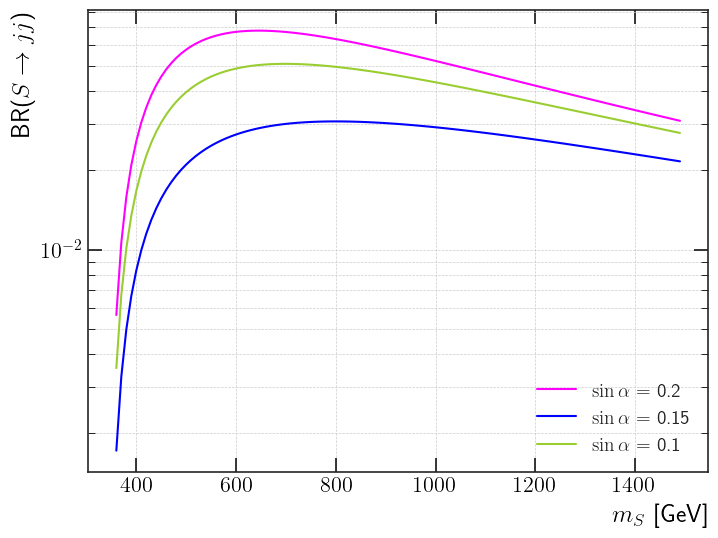

In [11]:
import seaborn as sns
sns.set_style("white")
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(MSd_list, BRqq_list, label=r'$\sin{\alpha} = $ 0.2 ', color='magenta', linestyle='solid')
plt.plot(MSd_list, BRqq_list2, label=r'$\sin{\alpha} = $ 0.15 ', color='blue', linestyle='solid')
plt.plot(MSd_list, BRqq_list3, label=r'$\sin{\alpha}= $ 0.1', color='yellowgreen', linestyle='solid')
plt.xlabel(r'$m_{S}$ [GeV]', color='black',size=18,  labelpad=5, loc="right")
plt.ylabel(r'BR($S \rightarrow j j$)',size=18, color='black',labelpad=5, loc="top")
ax.tick_params(axis='x', labelcolor='black', labelsize=14)
ax.tick_params(axis='y', labelcolor='black', labelsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.yscale('log')
ax.tick_params(direction='in', length=10, width=1.1, colors='black', which='major', top=True, right=True)
ax.tick_params(direction='in', length=5, width=0.6, colors='black', which='minor', top=True, right=True)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
for spine in ['left', 'right', 'top', 'bottom']:
    ax.spines[spine].set_linewidth(1.2)
sns.despine(left=False, bottom=False, right=False, top=False, offset=None, trim=False)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
legend = plt.legend(loc='lower right', fontsize=14)
legend.get_frame().set_alpha(0.0)
plt.show()

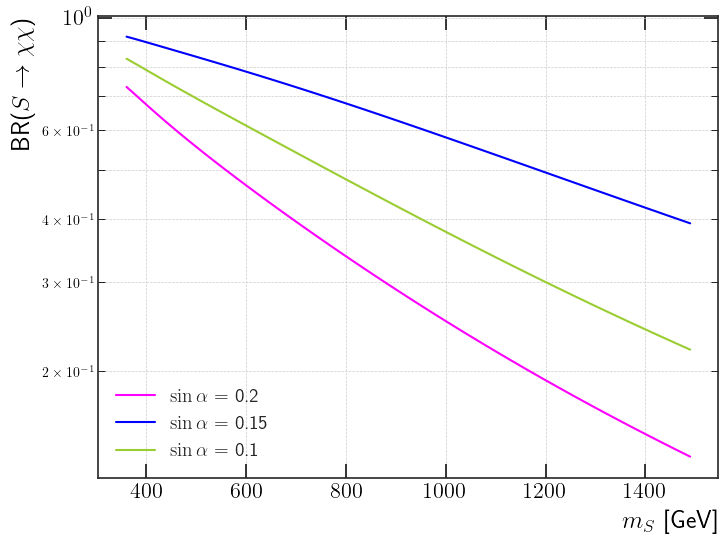

In [12]:
import seaborn as sns
sns.set_style("white")
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(MSd_list, BRXdXd_list, label=r'$\sin{\alpha} = $ 0.2 ', color='magenta', linestyle='solid')
plt.plot(MSd_list, BRXdXd_list2, label=r'$\sin{\alpha} = $ 0.15 ', color='blue', linestyle='solid')
plt.plot(MSd_list, BRXdXd_list3, label=r'$\sin{\alpha}= $ 0.1', color='yellowgreen', linestyle='solid')
plt.xlabel(r'$m_{S}$ [GeV]', color='black',size=18,  labelpad=5, loc="right")
plt.ylabel(r'BR($S \rightarrow \chi \chi$)',size=18, color='black',labelpad=5, loc="top")
ax.tick_params(axis='x', labelcolor='black', labelsize=14)
ax.tick_params(axis='y', labelcolor='black', labelsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.yscale('log')
ax.tick_params(direction='in', length=10, width=1.1, colors='black', which='major', top=True, right=True)
ax.tick_params(direction='in', length=5, width=0.6, colors='black', which='minor', top=True, right=True)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
for spine in ['left', 'right', 'top', 'bottom']:
    ax.spines[spine].set_linewidth(1.2)
sns.despine(left=False, bottom=False, right=False, top=False, offset=None, trim=False)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
legend = plt.legend(loc='lower left', fontsize=14)
legend.get_frame().set_alpha(0.0)
plt.show()